In [725]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [726]:
df=pd.read_csv("G:/JPMC/car_insurance_claim.csv")

In [727]:
df.shape

(10302, 27)

In [728]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   BIRTH       10302 non-null  object 
 3   AGE         10295 non-null  float64
 4   HOMEKIDS    10302 non-null  int64  
 5   YOJ         9754 non-null   float64
 6   INCOME      9732 non-null   object 
 7   PARENT1     10302 non-null  object 
 8   HOME_VAL    9727 non-null   object 
 9   MSTATUS     10302 non-null  object 
 10  GENDER      10302 non-null  object 
 11  EDUCATION   10302 non-null  object 
 12  OCCUPATION  9637 non-null   object 
 13  TRAVTIME    10302 non-null  int64  
 14  CAR_USE     10302 non-null  object 
 15  BLUEBOOK    10302 non-null  object 
 16  TIF         10302 non-null  int64  
 17  CAR_TYPE    10302 non-null  object 
 18  RED_CAR     10302 non-null  object 
 19  OLDCLAIM    10302 non-nul

# Target Variable

In [729]:
# CLAIM_FLAG --> TARGET VARIABLE

# YOJ(float) , INCOME(object) , HOME_VAL(object) , OCCUPATION(object) , CAR_AGE(float)  : HAVE SOME NULL VALUES 

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CLAIM_FLAG', ylabel='Density'>

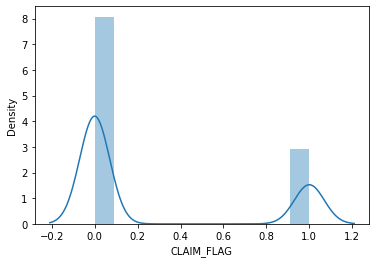

In [730]:
sns.distplot(df['CLAIM_FLAG'])

In [731]:
# From the graph , it can be observed that ,
    # Roughly around 20% data is fraud claims .

In [732]:
df[df['CLAIM_FLAG']==1].shape

(2746, 27)

In [733]:
df.shape

(10302, 27)

In [734]:
2746/10302
# Percentage of fraud claims 

0.2665501844302077

# Univariate Analysis

In [735]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   BIRTH       10302 non-null  object 
 3   AGE         10295 non-null  float64
 4   HOMEKIDS    10302 non-null  int64  
 5   YOJ         9754 non-null   float64
 6   INCOME      9732 non-null   object 
 7   PARENT1     10302 non-null  object 
 8   HOME_VAL    9727 non-null   object 
 9   MSTATUS     10302 non-null  object 
 10  GENDER      10302 non-null  object 
 11  EDUCATION   10302 non-null  object 
 12  OCCUPATION  9637 non-null   object 
 13  TRAVTIME    10302 non-null  int64  
 14  CAR_USE     10302 non-null  object 
 15  BLUEBOOK    10302 non-null  object 
 16  TIF         10302 non-null  int64  
 17  CAR_TYPE    10302 non-null  object 
 18  RED_CAR     10302 non-null  object 
 19  OLDCLAIM    10302 non-nul

In [736]:
df['HOME_VAL'].head()

0          $0
1    $257,252
2          $0
3    $124,191
4    $306,251
Name: HOME_VAL, dtype: object

In [737]:
df['KIDSDRIV'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [738]:
df['BIRTH'].unique()

array(['16MAR39', '21JAN56', '18NOV51', ..., '13AUG54', '18JUN51',
       '27FEB47'], dtype=object)

In [739]:
df['CAR_AGE'].nunique()

30

In [740]:
df['BIRTH'].nunique()

6560

In [741]:
df['AGE'].nunique()

61

In [742]:
# Birth is the DOB of the owner of the car
# Age is the age of the owner of the car
# since one is derivable from the other 
# any one of the two is enough for training of the model 

In [743]:
df['HOMEKIDS'].nunique()

6

In [744]:
df['HOMEKIDS'].value_counts()

0    6694
2    1427
1    1106
3     856
4     201
5      18
Name: HOMEKIDS, dtype: int64

In [745]:
df['YOJ'].unique()
# Years on job

array([11., 10., 14., nan, 12.,  7.,  5.,  0., 13.,  9., 17.,  8., 15.,
       16.,  6., 18., 23.,  4.,  3.,  2., 19.,  1.])

In [746]:
df['INCOME'].nunique()

8151

In [747]:
df['INCOME'].head()

0    $67,349
1    $91,449
2    $52,881
3    $16,039
4        NaN
Name: INCOME, dtype: object

In [748]:
# Income field is of object dtype
# Its actually number but just to add a dollar symbol in front , it was converted to object datatype 

In [749]:
df['PARENT1'].nunique()

2

In [750]:
df['PARENT1'].value_counts()

No     8959
Yes    1343
Name: PARENT1, dtype: int64

In [751]:
#Single parent or not

In [752]:
df['HOME_VAL'].nunique()

6334

In [753]:
# It is also in dollars hence of object dtype , similar to income

In [754]:
df['MSTATUS'].unique()

array(['z_No', 'Yes'], dtype=object)

In [755]:
df['MSTATUS'].value_counts()

Yes     6188
z_No    4114
Name: MSTATUS, dtype: int64

In [756]:
# MSTATUS : Marital status

In [757]:
df['GENDER'].value_counts()

z_F    5545
M      4757
Name: GENDER, dtype: int64

In [758]:
df['EDUCATION'].value_counts()

z_High School    2952
Bachelors        2823
Masters          2078
<High School     1515
PhD               934
Name: EDUCATION, dtype: int64

In [759]:
df['OCCUPATION'].value_counts()

z_Blue Collar    2288
Clerical         1590
Professional     1408
Manager          1257
Lawyer           1031
Student           899
Home Maker        843
Doctor            321
Name: OCCUPATION, dtype: int64

In [760]:
df['TRAVTIME'].head()

0    14
1    22
2    26
3     5
4    32
Name: TRAVTIME, dtype: int64

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TRAVTIME', ylabel='Density'>

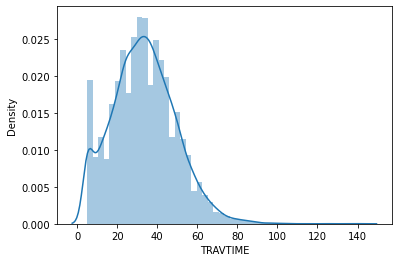

In [761]:
sns.distplot(df['TRAVTIME'])

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TRAVTIME'>

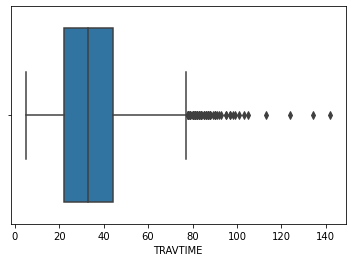

In [762]:
sns.boxplot(df['TRAVTIME'])

In [763]:
# more travel time --> more risk of crashes 

In [764]:
df['CAR_USE'].value_counts()

Private       6513
Commercial    3789
Name: CAR_USE, dtype: int64

In [765]:
# This featuer specifies if the car is used for commercial purpose or private 

In [766]:
df['BLUEBOOK']

0        $14,230
1        $14,940
2        $21,970
3         $4,010
4        $15,440
          ...   
10297    $13,270
10298    $24,490
10299    $13,820
10300    $22,550
10301    $19,400
Name: BLUEBOOK, Length: 10302, dtype: object

In [767]:
# Bluebook : Value of the vehicle

In [768]:
# object dtype --> similar to income

In [769]:
df['TIF'].head()

0    11
1     1
2     1
3     4
4     7
Name: TIF, dtype: int64

In [770]:
# TIF : Time in Force 
# People who have been customers for long itme

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TIF', ylabel='Density'>

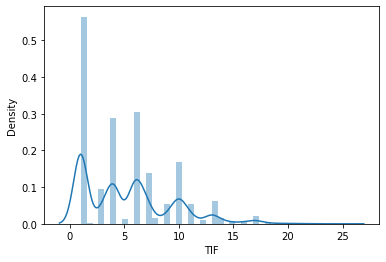

In [771]:
sns.distplot(df['TIF'])
# No pattern 

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TIF'>

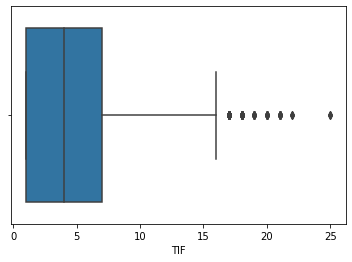

In [772]:
sns.boxplot(df['TIF'])

In [773]:
# customers who are with the company for long time --> less likely to be fraud 

In [774]:
df['CAR_TYPE'].value_counts()

z_SUV          2883
Minivan        2694
Pickup         1772
Sports Car     1179
Van             921
Panel Truck     853
Name: CAR_TYPE, dtype: int64

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CAR_TYPE', ylabel='count'>

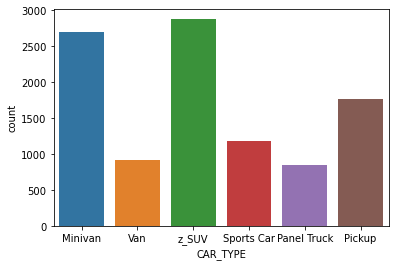

In [775]:
sns.countplot(df['CAR_TYPE'])

In [776]:
df['RED_CAR'].value_counts()

no     7326
yes    2976
Name: RED_CAR, dtype: int64

In [777]:
# this feature gives : if the car is red or not
# generally they say : red cars are sprts cars and are risky 

In [778]:
df['OLDCLAIM'].value_counts()

$0         6292
$1,310        4
$4,448        4
$1,391        4
$4,188        4
           ... 
$3,340        1
$20,330       1
$7,829        1
$2,043        1
$9,245        1
Name: OLDCLAIM, Length: 3545, dtype: int64

In [779]:
# How much insurance money they took in the past 5 years
# dtype : object similar to income

In [780]:
df['CLM_FREQ'].value_counts()

0    6292
2    1492
1    1279
3     992
4     225
5      22
Name: CLM_FREQ, dtype: int64

In [781]:
# no.of times they took the claim

In [782]:
df['REVOKED'].value_counts()

No     9041
Yes    1261
Name: REVOKED, dtype: int64

In [783]:
# In past 7 yrs , was his license revoked 
# if yes --> he is a more risky driver

In [784]:
df['MVR_PTS']

0        3
1        0
2        2
3        3
4        0
        ..
10297    2
10298    0
10299    0
10300    0
10301    0
Name: MVR_PTS, Length: 10302, dtype: int64

In [785]:
# Motor Vehicle Record Points

In [786]:
# If u get lots of traffic tickets
    # a ticket issued for driving above the speed limit.

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MVR_PTS', ylabel='Density'>

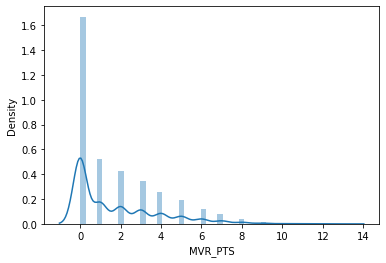

In [787]:
sns.distplot(df['MVR_PTS'])

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MVR_PTS', ylabel='count'>

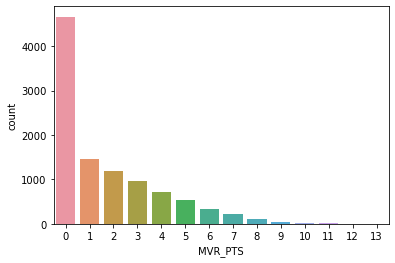

In [788]:
sns.countplot(df['MVR_PTS'])

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MVR_PTS'>

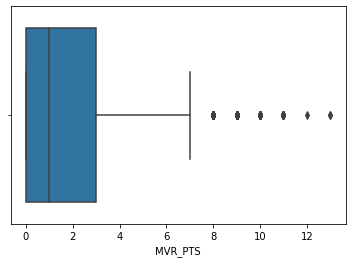

In [789]:
sns.boxplot(df['MVR_PTS'])

In [790]:
df['CLM_AMT'].value_counts()

$0         7556
$2,327        4
$3,674        4
$3,350        4
$4,363        4
           ... 
$5,837        1
$9,663        1
$856          1
$24,494       1
$1,815        1
Name: CLM_AMT, Length: 2346, dtype: int64

In [791]:
df['CLM_AMT'].nunique()

2346

In [792]:
df['CLM_AMT'].isna().sum()

0

In [793]:
# How much amount they havve claimed until now
# dtype : object similar to income

In [794]:
df['CAR_AGE']

0        18.0
1         1.0
2        10.0
3        10.0
4         6.0
         ... 
10297    17.0
10298     1.0
10299     1.0
10300    11.0
10301     9.0
Name: CAR_AGE, Length: 10302, dtype: float64

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CAR_AGE', ylabel='Density'>

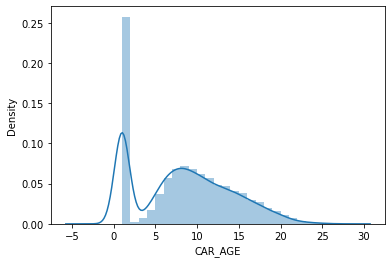

In [795]:
sns.distplot(df['CAR_AGE'])

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CAR_AGE'>

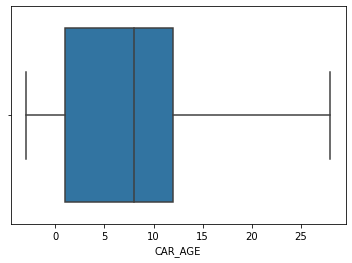

In [796]:
sns.boxplot(df['CAR_AGE'])

In [797]:
df['URBANICITY'].value_counts()

Highly Urban/ Urban      8230
z_Highly Rural/ Rural    2072
Name: URBANICITY, dtype: int64

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='URBANICITY', ylabel='count'>

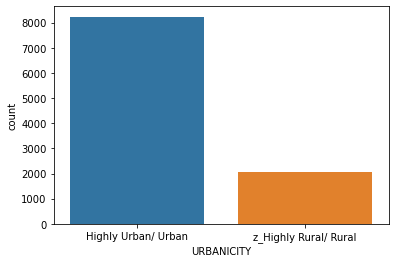

In [798]:
sns.countplot(df['URBANICITY'])

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CLAIM_FLAG', ylabel='count'>

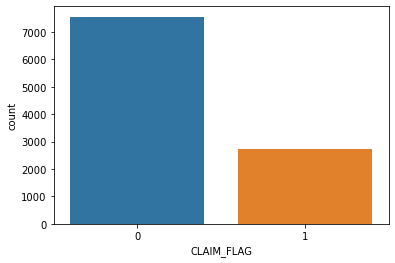

In [799]:
sns.countplot(df['CLAIM_FLAG'])

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CLAIM_FLAG', ylabel='CAR_AGE'>

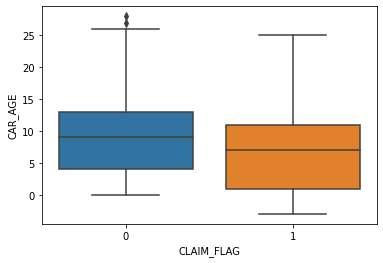

In [800]:
sns.boxplot(df['CLAIM_FLAG'],df['CAR_AGE'])

# Categorical Variables

In [801]:
# Converting the columns of object type to float

In [802]:
df[['INCOME' , 'HOME_VAL' , 'BLUEBOOK' , 'OLDCLAIM', 'CLM_AMT']]=df[['INCOME' , 'HOME_VAL' , 'BLUEBOOK' , 'OLDCLAIM', 'CLM_AMT']].replace('[\$,]', '', regex=True).astype(float)

In [803]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   BIRTH       10302 non-null  object 
 3   AGE         10295 non-null  float64
 4   HOMEKIDS    10302 non-null  int64  
 5   YOJ         9754 non-null   float64
 6   INCOME      9732 non-null   float64
 7   PARENT1     10302 non-null  object 
 8   HOME_VAL    9727 non-null   float64
 9   MSTATUS     10302 non-null  object 
 10  GENDER      10302 non-null  object 
 11  EDUCATION   10302 non-null  object 
 12  OCCUPATION  9637 non-null   object 
 13  TRAVTIME    10302 non-null  int64  
 14  CAR_USE     10302 non-null  object 
 15  BLUEBOOK    10302 non-null  float64
 16  TIF         10302 non-null  int64  
 17  CAR_TYPE    10302 non-null  object 
 18  RED_CAR     10302 non-null  object 
 19  OLDCLAIM    10302 non-nul

In [804]:
df.drop('BIRTH',axis=1,inplace=True)
# Dropping birth , since we have age

In [805]:
# CONVERTING CATEGORICAL COLUMNS TO NUMERICAL 

In [806]:
df1=pd.get_dummies(df,columns=['PARENT1','MSTATUS','GENDER','RED_CAR','REVOKED','URBANICITY','CAR_USE'],drop_first=True)

In [807]:
df1.head()

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,EDUCATION,OCCUPATION,TRAVTIME,...,CLM_AMT,CAR_AGE,CLAIM_FLAG,PARENT1_Yes,MSTATUS_z_No,GENDER_z_F,RED_CAR_yes,REVOKED_Yes,URBANICITY_z_Highly Rural/ Rural,CAR_USE_Private
0,63581743,0,60.0,0,11.0,67349.0,0.0,PhD,Professional,14,...,0.0,18.0,0,0,1,0,1,0,0,1
1,132761049,0,43.0,0,11.0,91449.0,257252.0,z_High School,z_Blue Collar,22,...,0.0,1.0,0,0,1,0,1,0,0,0
2,921317019,0,48.0,0,11.0,52881.0,0.0,Bachelors,Manager,26,...,0.0,10.0,0,0,1,0,1,0,0,1
3,727598473,0,35.0,1,10.0,16039.0,124191.0,z_High School,Clerical,5,...,0.0,10.0,0,0,0,1,0,0,0,1
4,450221861,0,51.0,0,14.0,NaN,306251.0,<High School,z_Blue Collar,32,...,0.0,6.0,0,0,0,0,1,0,0,1


In [808]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                10302 non-null  int64  
 1   KIDSDRIV                          10302 non-null  int64  
 2   AGE                               10295 non-null  float64
 3   HOMEKIDS                          10302 non-null  int64  
 4   YOJ                               9754 non-null   float64
 5   INCOME                            9732 non-null   float64
 6   HOME_VAL                          9727 non-null   float64
 7   EDUCATION                         10302 non-null  object 
 8   OCCUPATION                        9637 non-null   object 
 9   TRAVTIME                          10302 non-null  int64  
 10  BLUEBOOK                          10302 non-null  float64
 11  TIF                               10302 non-null  int64  
 12  CAR_

In [809]:
# Converting education column to int 

In [810]:
df1['EDUCATION'].value_counts()

z_High School    2952
Bachelors        2823
Masters          2078
<High School     1515
PhD               934
Name: EDUCATION, dtype: int64

In [811]:
education_dict={'<High School':1,'z_High School':2,'Bachelors':3,'Masters':4,'PhD':5}

In [812]:
df1['EDUCATION']=df1['EDUCATION'].map(education_dict)

In [813]:
df1['EDUCATION']

0        5
1        2
2        3
3        2
4        1
        ..
10297    5
10298    4
10299    1
10300    3
10301    2
Name: EDUCATION, Length: 10302, dtype: int64

In [814]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                10302 non-null  int64  
 1   KIDSDRIV                          10302 non-null  int64  
 2   AGE                               10295 non-null  float64
 3   HOMEKIDS                          10302 non-null  int64  
 4   YOJ                               9754 non-null   float64
 5   INCOME                            9732 non-null   float64
 6   HOME_VAL                          9727 non-null   float64
 7   EDUCATION                         10302 non-null  int64  
 8   OCCUPATION                        9637 non-null   object 
 9   TRAVTIME                          10302 non-null  int64  
 10  BLUEBOOK                          10302 non-null  float64
 11  TIF                               10302 non-null  int64  
 12  CAR_

In [815]:
df['CAR_TYPE'].value_counts()

z_SUV          2883
Minivan        2694
Pickup         1772
Sports Car     1179
Van             921
Panel Truck     853
Name: CAR_TYPE, dtype: int64

In [816]:
df['OCCUPATION'].value_counts()

z_Blue Collar    2288
Clerical         1590
Professional     1408
Manager          1257
Lawyer           1031
Student           899
Home Maker        843
Doctor            321
Name: OCCUPATION, dtype: int64

In [817]:
# converting categorical variables to numerical which do not have any natural ordering 

In [818]:
from sklearn.preprocessing import LabelEncoder

In [819]:
le=LabelEncoder()

In [820]:
df1['OCCUPATION']=le.fit_transform(df1['OCCUPATION'])

In [821]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                10302 non-null  int64  
 1   KIDSDRIV                          10302 non-null  int64  
 2   AGE                               10295 non-null  float64
 3   HOMEKIDS                          10302 non-null  int64  
 4   YOJ                               9754 non-null   float64
 5   INCOME                            9732 non-null   float64
 6   HOME_VAL                          9727 non-null   float64
 7   EDUCATION                         10302 non-null  int64  
 8   OCCUPATION                        10302 non-null  int32  
 9   TRAVTIME                          10302 non-null  int64  
 10  BLUEBOOK                          10302 non-null  float64
 11  TIF                               10302 non-null  int64  
 12  CAR_

In [822]:
df1['CAR_TYPE']=le.fit_transform(df['CAR_TYPE'])

In [823]:
df1['OCCUPATION'].head()

0    5
1    7
2    4
3    0
4    7
Name: OCCUPATION, dtype: int32

In [824]:
df1['CAR_TYPE'].head()

0    0
1    0
2    4
3    5
4    0
Name: CAR_TYPE, dtype: int32

In [825]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                10302 non-null  int64  
 1   KIDSDRIV                          10302 non-null  int64  
 2   AGE                               10295 non-null  float64
 3   HOMEKIDS                          10302 non-null  int64  
 4   YOJ                               9754 non-null   float64
 5   INCOME                            9732 non-null   float64
 6   HOME_VAL                          9727 non-null   float64
 7   EDUCATION                         10302 non-null  int64  
 8   OCCUPATION                        10302 non-null  int32  
 9   TRAVTIME                          10302 non-null  int64  
 10  BLUEBOOK                          10302 non-null  float64
 11  TIF                               10302 non-null  int64  
 12  CAR_

In [826]:
df1.head()

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,EDUCATION,OCCUPATION,TRAVTIME,...,CLM_AMT,CAR_AGE,CLAIM_FLAG,PARENT1_Yes,MSTATUS_z_No,GENDER_z_F,RED_CAR_yes,REVOKED_Yes,URBANICITY_z_Highly Rural/ Rural,CAR_USE_Private
0,63581743,0,60.0,0,11.0,67349.0,0.0,5,5,14,...,0.0,18.0,0,0,1,0,1,0,0,1
1,132761049,0,43.0,0,11.0,91449.0,257252.0,2,7,22,...,0.0,1.0,0,0,1,0,1,0,0,0
2,921317019,0,48.0,0,11.0,52881.0,0.0,3,4,26,...,0.0,10.0,0,0,1,0,1,0,0,1
3,727598473,0,35.0,1,10.0,16039.0,124191.0,2,0,5,...,0.0,10.0,0,0,0,1,0,0,0,1
4,450221861,0,51.0,0,14.0,NaN,306251.0,1,7,32,...,0.0,6.0,0,0,0,0,1,0,0,1


In [827]:
df1.shape

(10302, 26)

# Handling Missing Values

In [828]:
# age , yoj , income , home_val , car_age have null values 

In [829]:
df1['YOJ'].isnull().sum()

548

In [830]:
df1['YOJ'].head()

0    11.0
1    11.0
2    11.0
3    10.0
4    14.0
Name: YOJ, dtype: float64

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YOJ'>

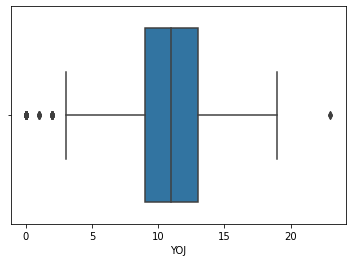

In [831]:
sns.boxplot(df['YOJ'])

<AxesSubplot:>

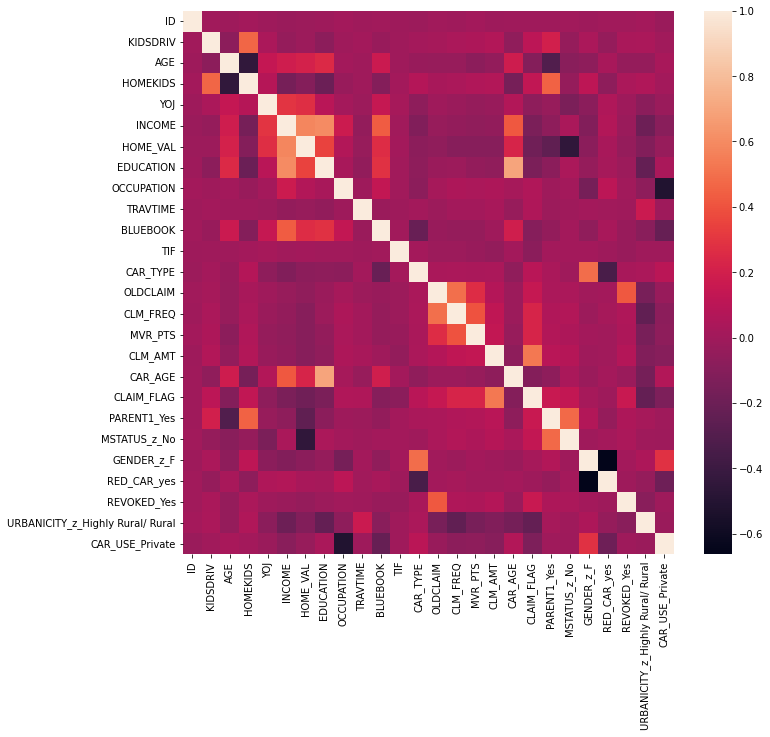

In [832]:
plt.figure(figsize=(11,10))
sns.heatmap(df1.corr())

<AxesSubplot:>

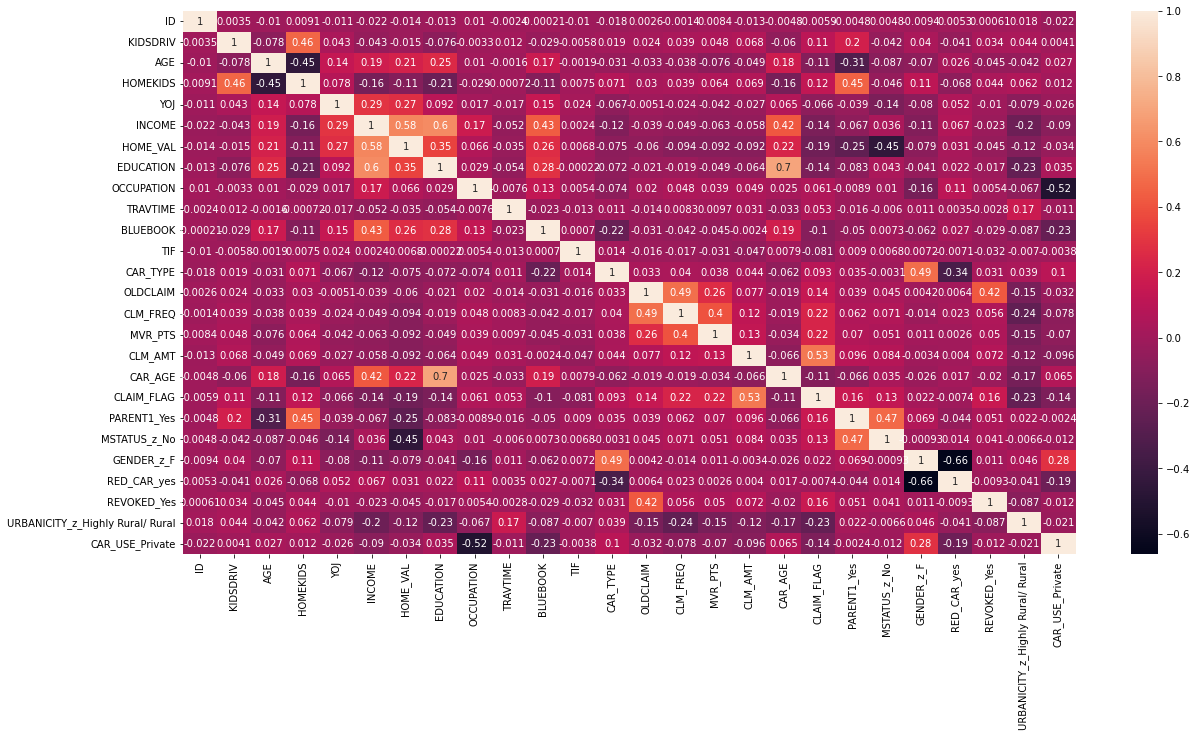

In [833]:
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(),annot=True)

In [834]:
df1.corr()

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,EDUCATION,OCCUPATION,TRAVTIME,...,CLM_AMT,CAR_AGE,CLAIM_FLAG,PARENT1_Yes,MSTATUS_z_No,GENDER_z_F,RED_CAR_yes,REVOKED_Yes,URBANICITY_z_Highly Rural/ Rural,CAR_USE_Private
ID,1.000000,0.003508,-0.010423,0.009144,-0.011068,-0.021582,-0.014370,-0.013469,0.010004,-0.002410,...,-0.012758,-0.004771,-0.005938,-0.004776,0.004788,-0.009397,0.005298,0.000611,0.017789,-0.022025
KIDSDRIV,0.003508,1.000000,-0.078427,0.463653,0.042971,-0.043217,-0.015447,-0.075693,-0.003304,0.012207,...,0.068283,-0.059629,0.108421,0.200157,-0.041655,0.039712,-0.040508,0.033639,0.043622,0.004146
AGE,-0.010423,-0.078427,1.000000,-0.447787,0.140878,0.186202,0.209600,0.249044,0.009973,-0.001569,...,-0.049034,0.178592,-0.106969,-0.311327,-0.086978,-0.069575,0.025881,-0.045050,-0.042466,0.027244
HOMEKIDS,0.009144,0.463653,-0.447787,1.000000,0.077707,-0.160230,-0.107483,-0.205273,-0.028984,-0.000722,...,0.068646,-0.159008,0.123049,0.448719,-0.045968,0.113403,-0.068117,0.044181,0.061663,0.011858
YOJ,-0.011068,0.042971,0.140878,0.077707,1.000000,0.293899,0.272198,0.092418,0.017360,-0.017152,...,-0.026799,0.064685,-0.066265,-0.039228,-0.140585,-0.079523,0.051933,-0.009953,-0.078897,-0.025926
INCOME,-0.021582,-0.043217,0.186202,-0.160230,0.293899,1.000000,0.578943,0.602827,0.173961,-0.051853,...,-0.057686,0.417301,-0.142587,-0.067161,0.035683,-0.114121,0.066612,-0.022934,-0.201396,-0.089545
HOME_VAL,-0.014370,-0.015447,0.209600,-0.107483,0.272198,0.578943,1.000000,0.349313,0.066376,-0.035139,...,-0.091987,0.223198,-0.185390,-0.250375,-0.453815,-0.079170,0.030581,-0.044790,-0.116663,-0.033893
EDUCATION,-0.013469,-0.075693,0.249044,-0.205273,0.092418,0.602827,0.349313,1.000000,0.028638,-0.053723,...,-0.064032,0.695094,-0.139579,-0.083224,0.043057,-0.041325,0.022471,-0.017217,-0.228093,0.034905
OCCUPATION,0.010004,-0.003304,0.009973,-0.028984,0.017360,0.173961,0.066376,0.028638,1.000000,-0.007595,...,0.049446,0.025411,0.061061,-0.008923,0.010069,-0.158000,0.105488,0.005377,-0.067265,-0.515466
TRAVTIME,-0.002410,0.012207,-0.001569,-0.000722,-0.017152,-0.051853,-0.035139,-0.053723,-0.007595,1.000000,...,0.031270,-0.033290,0.053283,-0.015810,-0.006010,0.010539,0.003478,-0.002764,0.166567,-0.010988


C:\Users\boddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,EDUCATION,OCCUPATION,TRAVTIME,...,CLM_AMT,CAR_AGE,CLAIM_FLAG,PARENT1_Yes,MSTATUS_z_No,GENDER_z_F,RED_CAR_yes,REVOKED_Yes,URBANICITY_z_Highly Rural/ Rural,CAR_USE_Private
count,1.030200e+04,10302.000000,10295.000000,10302.000000,9754.000000,9732.000000,9727.000000,10302.000000,10302.000000,10302.000000,...,10302.000000,9663.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000
mean,4.956631e+08,0.169288,44.837397,0.720443,10.474062,61572.073263,154523.018608,2.802368,4.261114,33.416424,...,1511.266453,8.298148,0.266550,0.130363,0.399340,0.538245,0.288876,0.122403,0.201126,0.632207
std,2.864675e+08,0.506512,8.606445,1.116323,4.108943,47457.202749,129188.439405,1.183307,2.574313,15.869687,...,4725.249896,5.714450,0.442177,0.336719,0.489787,0.498559,0.453262,0.327767,0.400861,0.482228
min,6.317500e+04,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,5.000000,...,0.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.442869e+08,0.000000,39.000000,0.000000,9.000000,27584.000000,0.000000,2.000000,2.000000,22.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.970043e+08,0.000000,45.000000,0.000000,11.000000,53529.000000,160661.000000,3.000000,5.000000,33.000000,...,0.000000,8.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,7.394551e+08,0.000000,51.000000,1.000000,13.000000,86166.000000,238256.000000,4.000000,7.000000,44.000000,...,1144.750000,12.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,9.999264e+08,4.000000,81.000000,5.000000,23.000000,367030.000000,885282.000000,5.000000,8.000000,142.000000,...,123247.000000,28.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


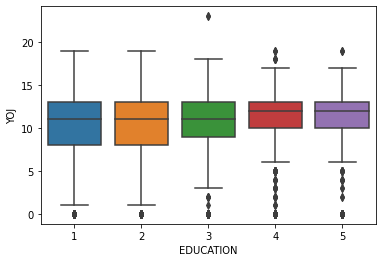

In [835]:
sns.boxplot(df1['EDUCATION'],df1['YOJ'])
(df1.describe())

In [836]:
df1.groupby('OCCUPATION')['YOJ'].median()

OCCUPATION
0    12.0
1    12.0
2     5.0
3    12.0
4    12.0
5    12.0
6     6.0
7    12.0
8    12.0
Name: YOJ, dtype: float64

In [837]:
df1['YOJ'].fillna(df1.groupby('OCCUPATION')['YOJ'].transform('median'),inplace=True)

In [838]:
df1['YOJ'].isnull().sum()

0

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AGE'>

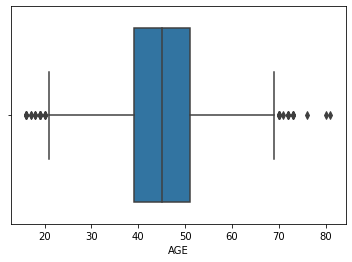

In [839]:
sns.boxplot(df1['AGE'])

In [840]:
df1.groupby('OCCUPATION')['AGE'].median()

OCCUPATION
0    42.0
1    51.0
2    45.0
3    48.0
4    47.0
5    46.0
6    41.0
7    43.0
8    47.0
Name: AGE, dtype: float64

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OCCUPATION', ylabel='AGE'>

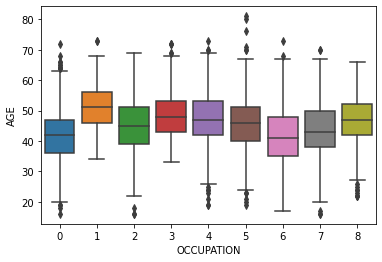

In [841]:
sns.boxplot(df1['OCCUPATION'],df1['AGE'])

In [842]:
df1['AGE'].fillna(df1.groupby('OCCUPATION')['AGE'].transform('median'),inplace=True)

In [843]:
df1['AGE'].isnull().sum()

0

In [844]:
# Income depends on occupation and urbanicity

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='INCOME'>

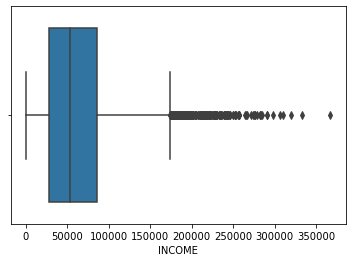

In [845]:
sns.boxplot(df1['INCOME'])

In [846]:
df1.groupby(['OCCUPATION','URBANICITY_z_Highly Rural/ Rural'])['INCOME'].median()

OCCUPATION  URBANICITY_z_Highly Rural/ Rural
0           0                                    30508.0
            1                                    31270.0
1           0                                   121553.0
            1                                   120074.0
2           0                                        0.0
            1                                     4200.5
3           0                                    83720.0
            1                                    74786.5
4           0                                    78589.0
5           0                                    70628.0
            1                                    74378.0
6           0                                      948.0
            1                                        0.0
7           0                                    53008.0
            1                                    55718.0
8           0                                   110330.0
            1                              

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='URBANICITY_z_Highly Rural/ Rural', ylabel='INCOME'>

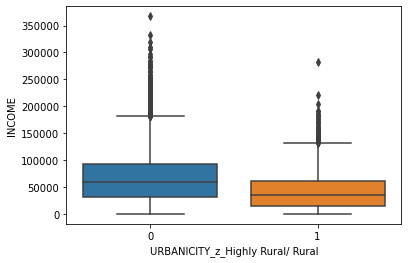

In [847]:
sns.boxplot(df1['URBANICITY_z_Highly Rural/ Rural'],df1['INCOME'])

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OCCUPATION', ylabel='INCOME'>

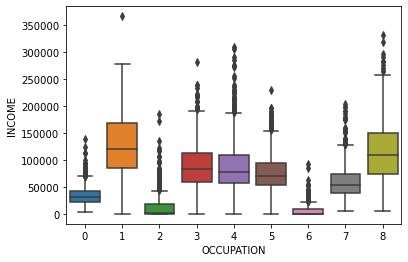

In [848]:
sns.boxplot(df1['OCCUPATION'],df1['INCOME'])

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='URBANICITY_z_Highly Rural/ Rural', ylabel='OCCUPATION'>

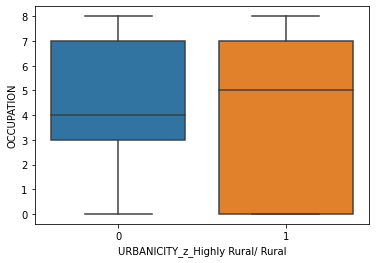

In [849]:
sns.boxplot(df1['URBANICITY_z_Highly Rural/ Rural'],df1['OCCUPATION'])

In [850]:
# as we can see that there is lot of dependency of income on both occupation , urbanicity 

In [851]:
df1['INCOME'].fillna(df1.groupby(['OCCUPATION','URBANICITY_z_Highly Rural/ Rural'])['INCOME'].transform('median'),inplace=True)

In [852]:
df1['INCOME'].isnull().sum()

0

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HOME_VAL'>

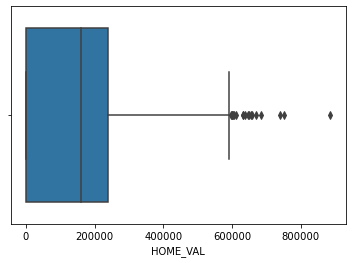

In [853]:
sns.boxplot(df1['HOME_VAL'])

In [854]:
df1.groupby('TIF')['HOME_VAL'].median()

TIF
1     159067.5
2     187412.0
3     163564.5
4     159041.0
5     159942.5
6     159224.5
7     159235.0
8     196524.0
9     161743.0
10    159346.5
11    159239.0
12    167687.5
13    182320.0
14    145148.0
15    169666.0
16    139820.5
17    175517.0
18    154749.0
19     87696.0
20    149875.5
21    193511.5
22    135076.0
25    240000.0
Name: HOME_VAL, dtype: float64

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TIF', ylabel='HOME_VAL'>

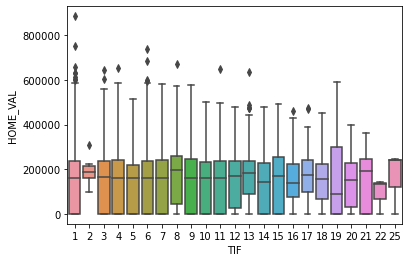

In [855]:
sns.boxplot(df1['TIF'],df1['HOME_VAL'])

In [856]:
df1.corr()

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,EDUCATION,OCCUPATION,TRAVTIME,...,CLM_AMT,CAR_AGE,CLAIM_FLAG,PARENT1_Yes,MSTATUS_z_No,GENDER_z_F,RED_CAR_yes,REVOKED_Yes,URBANICITY_z_Highly Rural/ Rural,CAR_USE_Private
ID,1.000000,0.003508,-0.010437,0.009144,-0.008697,-0.022716,-0.014370,-0.013469,0.010004,-0.002410,...,-0.012758,-0.004771,-0.005938,-0.004776,0.004788,-0.009397,0.005298,0.000611,0.017789,-0.022025
KIDSDRIV,0.003508,1.000000,-0.078357,0.463653,0.041908,-0.046949,-0.015447,-0.075693,-0.003304,0.012207,...,0.068283,-0.059629,0.108421,0.200157,-0.041655,0.039712,-0.040508,0.033639,0.043622,0.004146
AGE,-0.010437,-0.078357,1.000000,-0.447645,0.137645,0.185179,0.209648,0.249084,0.009983,-0.001481,...,-0.049117,0.178713,-0.107095,-0.311044,-0.086994,-0.069553,0.025560,-0.044954,-0.042465,0.027181
HOMEKIDS,0.009144,0.463653,-0.447645,1.000000,0.071715,-0.158716,-0.107483,-0.205273,-0.028984,-0.000722,...,0.068646,-0.159008,0.123049,0.448719,-0.045968,0.113403,-0.068117,0.044181,0.061663,0.011858
YOJ,-0.008697,0.041908,0.137645,0.071715,1.000000,0.302546,0.274455,0.096105,0.018203,-0.019199,...,-0.024865,0.068811,-0.065840,-0.036466,-0.134175,-0.083634,0.053179,-0.008546,-0.081065,-0.026577
INCOME,-0.022716,-0.046949,0.185179,-0.158716,0.302546,1.000000,0.574566,0.601093,0.176768,-0.051365,...,-0.057065,0.416551,-0.140161,-0.064252,0.035458,-0.118980,0.069013,-0.020260,-0.205586,-0.089824
HOME_VAL,-0.014370,-0.015447,0.209648,-0.107483,0.274455,0.574566,1.000000,0.349313,0.066376,-0.035139,...,-0.091987,0.223198,-0.185390,-0.250375,-0.453815,-0.079170,0.030581,-0.044790,-0.116663,-0.033893
EDUCATION,-0.013469,-0.075693,0.249084,-0.205273,0.096105,0.601093,0.349313,1.000000,0.028638,-0.053723,...,-0.064032,0.695094,-0.139579,-0.083224,0.043057,-0.041325,0.022471,-0.017217,-0.228093,0.034905
OCCUPATION,0.010004,-0.003304,0.009983,-0.028984,0.018203,0.176768,0.066376,0.028638,1.000000,-0.007595,...,0.049446,0.025411,0.061061,-0.008923,0.010069,-0.158000,0.105488,0.005377,-0.067265,-0.515466
TRAVTIME,-0.002410,0.012207,-0.001481,-0.000722,-0.019199,-0.051365,-0.035139,-0.053723,-0.007595,1.000000,...,0.031270,-0.033290,0.053283,-0.015810,-0.006010,0.010539,0.003478,-0.002764,0.166567,-0.010988


In [857]:
df1.groupby(['OCCUPATION'])['HOME_VAL'].median()

OCCUPATION
0    133631.0
1    282708.0
2     92206.5
3    229325.0
4    221902.0
5    211873.5
6         0.0
7    176831.0
8    240260.5
Name: HOME_VAL, dtype: float64

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OCCUPATION', ylabel='HOME_VAL'>

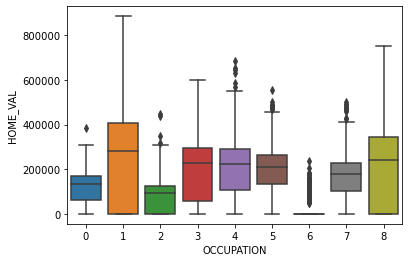

In [858]:
sns.boxplot(df1['OCCUPATION'],df1['HOME_VAL'])

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='URBANICITY_z_Highly Rural/ Rural', ylabel='HOME_VAL'>

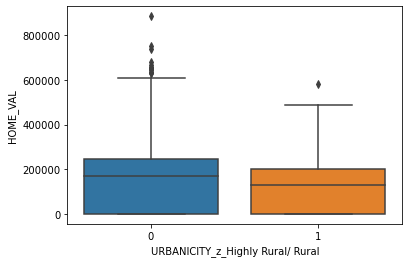

In [859]:
sns.boxplot(df1['URBANICITY_z_Highly Rural/ Rural'],df1['HOME_VAL'])

In [860]:
df1['HOME_VAL'].fillna(df1.groupby(['OCCUPATION','URBANICITY_z_Highly Rural/ Rural'])['HOME_VAL'].transform('median'),inplace=True)

In [861]:
df1['HOME_VAL'].isnull().sum()

0

# Handling Anomalies in Data

In [862]:
# there is a row with car age as -3 

In [863]:
#df1.drop(
df1.drop(df1[df1['CAR_AGE']<0].index,inplace=True)

In [864]:
df1['CAR_AGE'].unique()

array([18.,  1., 10.,  6., 17.,  7., 11.,  9.,  4.,  5., 13., 16., 20.,
       14., 12., 15., nan,  8.,  3., 21., 19., 23.,  0., 22.,  2., 26.,
       27., 24., 25., 28.])

In [865]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10301 entries, 0 to 10301
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                10301 non-null  int64  
 1   KIDSDRIV                          10301 non-null  int64  
 2   AGE                               10301 non-null  float64
 3   HOMEKIDS                          10301 non-null  int64  
 4   YOJ                               10301 non-null  float64
 5   INCOME                            10301 non-null  float64
 6   HOME_VAL                          10301 non-null  float64
 7   EDUCATION                         10301 non-null  int64  
 8   OCCUPATION                        10301 non-null  int32  
 9   TRAVTIME                          10301 non-null  int64  
 10  BLUEBOOK                          10301 non-null  float64
 11  TIF                               10301 non-null  int64  
 12  CAR_

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CAR_AGE'>

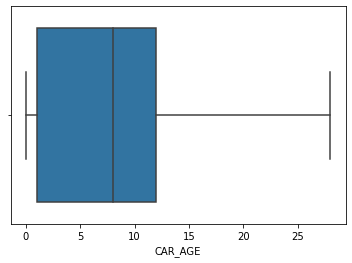

In [866]:
sns.boxplot(df1['CAR_AGE'])

In [867]:
df1['CAR_AGE'].fillna(df1['CAR_AGE'].median(),inplace=True)

In [868]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10301 entries, 0 to 10301
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                10301 non-null  int64  
 1   KIDSDRIV                          10301 non-null  int64  
 2   AGE                               10301 non-null  float64
 3   HOMEKIDS                          10301 non-null  int64  
 4   YOJ                               10301 non-null  float64
 5   INCOME                            10301 non-null  float64
 6   HOME_VAL                          10301 non-null  float64
 7   EDUCATION                         10301 non-null  int64  
 8   OCCUPATION                        10301 non-null  int32  
 9   TRAVTIME                          10301 non-null  int64  
 10  BLUEBOOK                          10301 non-null  float64
 11  TIF                               10301 non-null  int64  
 12  CAR_

In [869]:
df1.drop(['HOMEKIDS','ID'],axis=1,inplace=True)

In [870]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10301 entries, 0 to 10301
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   KIDSDRIV                          10301 non-null  int64  
 1   AGE                               10301 non-null  float64
 2   YOJ                               10301 non-null  float64
 3   INCOME                            10301 non-null  float64
 4   HOME_VAL                          10301 non-null  float64
 5   EDUCATION                         10301 non-null  int64  
 6   OCCUPATION                        10301 non-null  int32  
 7   TRAVTIME                          10301 non-null  int64  
 8   BLUEBOOK                          10301 non-null  float64
 9   TIF                               10301 non-null  int64  
 10  CAR_TYPE                          10301 non-null  int32  
 11  OLDCLAIM                          10301 non-null  float64
 12  CLM_

In [871]:
df['CLM_AMT'].value_counts()

0.0        7556
2327.0        4
3674.0        4
3350.0        4
4363.0        4
           ... 
5837.0        1
9663.0        1
856.0         1
24494.0       1
1815.0        1
Name: CLM_AMT, Length: 2346, dtype: int64

In [872]:
df['CLAIM_FLAG'].value_counts()

0    7556
1    2746
Name: CLAIM_FLAG, dtype: int64

In [873]:
# no insights from the above clm amt 
#df1.drop(['CLM_AMT'],axis=1,inplace=True)

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CLM_AMT'>

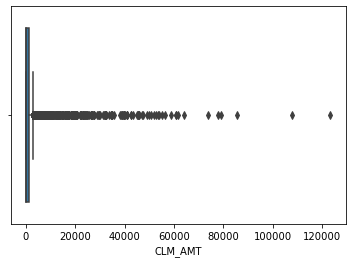

In [874]:
sns.boxplot(df1['CLM_AMT'])

In [875]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10301 entries, 0 to 10301
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   KIDSDRIV                          10301 non-null  int64  
 1   AGE                               10301 non-null  float64
 2   YOJ                               10301 non-null  float64
 3   INCOME                            10301 non-null  float64
 4   HOME_VAL                          10301 non-null  float64
 5   EDUCATION                         10301 non-null  int64  
 6   OCCUPATION                        10301 non-null  int32  
 7   TRAVTIME                          10301 non-null  int64  
 8   BLUEBOOK                          10301 non-null  float64
 9   TIF                               10301 non-null  int64  
 10  CAR_TYPE                          10301 non-null  int32  
 11  OLDCLAIM                          10301 non-null  float64
 12  CLM_

In [876]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

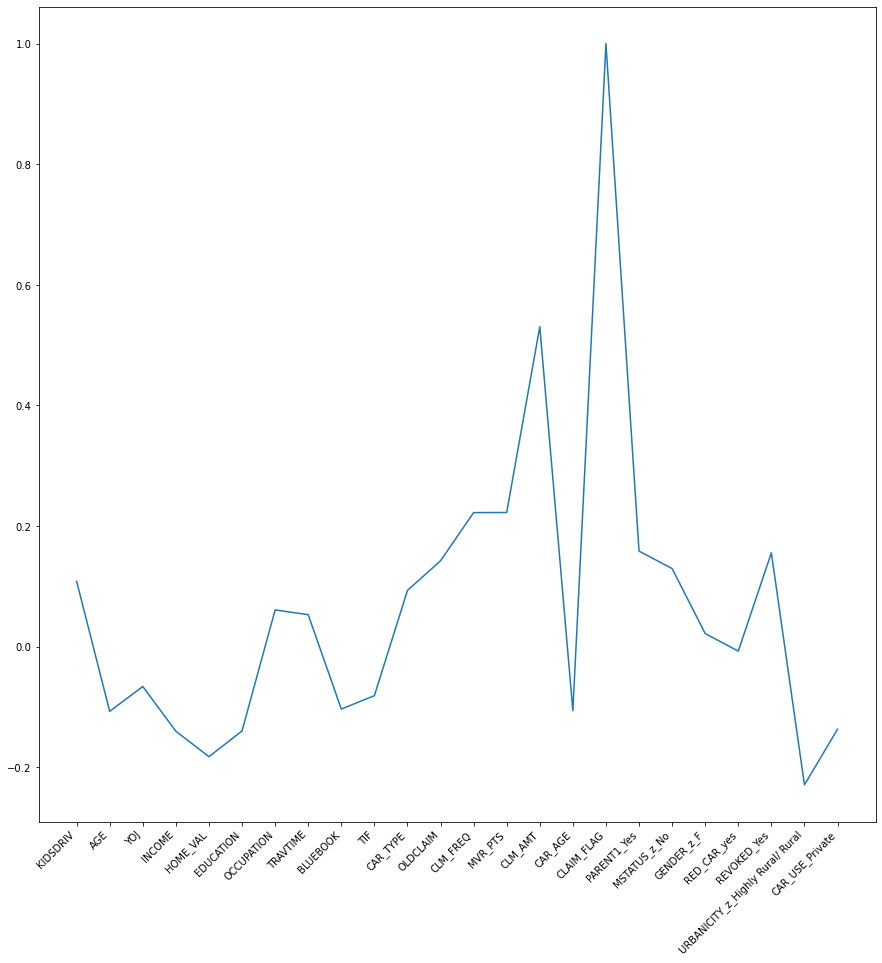

In [877]:
plt.figure(figsize=(15,15))
plt.plot(df1.corr().CLAIM_FLAG)
plt.xticks(rotation = 45, ha = 'right')

# Handling Outliers

In [878]:
df1.info()
#df1.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10301 entries, 0 to 10301
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   KIDSDRIV                          10301 non-null  int64  
 1   AGE                               10301 non-null  float64
 2   YOJ                               10301 non-null  float64
 3   INCOME                            10301 non-null  float64
 4   HOME_VAL                          10301 non-null  float64
 5   EDUCATION                         10301 non-null  int64  
 6   OCCUPATION                        10301 non-null  int32  
 7   TRAVTIME                          10301 non-null  int64  
 8   BLUEBOOK                          10301 non-null  float64
 9   TIF                               10301 non-null  int64  
 10  CAR_TYPE                          10301 non-null  int32  
 11  OLDCLAIM                          10301 non-null  float64
 12  CLM_

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='KIDSDRIV'>

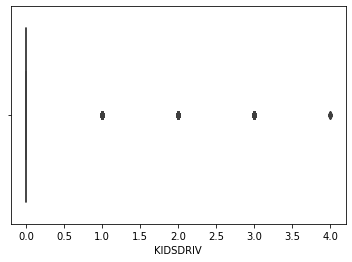

In [879]:
sns.boxplot(df1['KIDSDRIV'])
# Discrete data outliers detection is different

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AGE'>

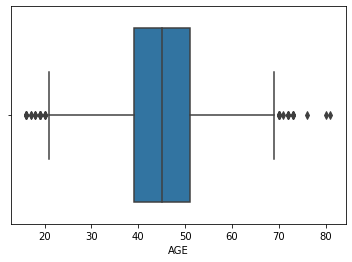

In [880]:
sns.boxplot(df1['AGE'])

In [881]:
tenth = np.percentile(df1['AGE'],10)
ninty = np.percentile(df1['AGE'],90)
df1['AGE']=np.where(df1['AGE']<tenth,tenth,df1['AGE'])
df1['AGE']=np.where(df1['AGE']>ninty,ninty,df1['AGE'])

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AGE'>

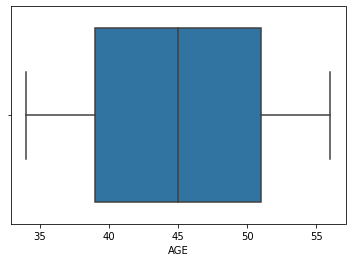

In [882]:
sns.boxplot(df1['AGE'])

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YOJ'>

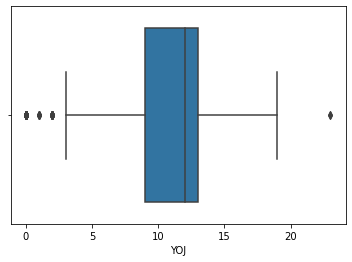

In [883]:
sns.boxplot(df1['YOJ'])

In [884]:
tenth = np.percentile(df1['YOJ'],10)
ninty = np.percentile(df1['YOJ'],90)
df1['YOJ']=np.where(df1['YOJ']<tenth,tenth,df1['YOJ'])
df1['YOJ']=np.where(df1['YOJ']>ninty,ninty,df1['YOJ'])

In [885]:
tenth

5.0

In [886]:
ninty

14.0

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YOJ'>

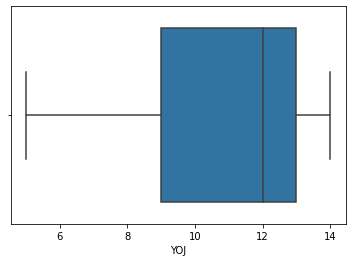

In [887]:
sns.boxplot(df1['YOJ'])

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CLM_AMT'>

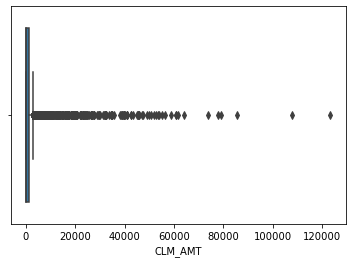

In [888]:
sns.boxplot(df1['CLM_AMT'])

In [889]:
df1['CLM_AMT'].describe()

count     10301.000000
mean       1511.270556
std        4725.479253
min           0.000000
25%           0.000000
50%           0.000000
75%        1144.000000
max      123247.000000
Name: CLM_AMT, dtype: float64

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CLAIM_FLAG', ylabel='count'>

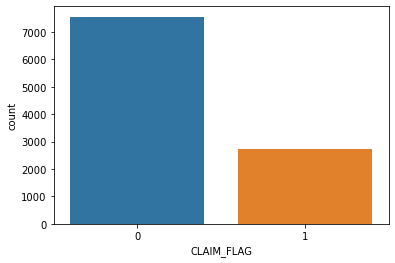

In [890]:
sns.countplot(df1['CLAIM_FLAG'])

In [891]:
def IQR(data):
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)

  IQR = Q3 - Q1
  LR = Q1 - (IQR * 1.5)
  UR = Q3 + (IQR * 1.5)

  return LR, UR

In [892]:
class_one = df1[df1['CLAIM_FLAG'] == 1]
class_zero = df1[df1['CLAIM_FLAG'] == 0]

In [893]:
LR1, UR1 = IQR(class_one.CLM_AMT)
class_one = class_one[(class_one['CLM_AMT'] > LR1) & (class_one['CLM_AMT'] < UR1)]

In [894]:
df1 = pd.concat([class_one, class_zero], axis = 0)

<AxesSubplot:xlabel='CLAIM_FLAG', ylabel='CLM_AMT'>

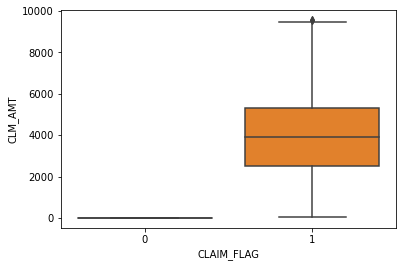

In [950]:
sns.boxplot(y = 'CLM_AMT', x = 'CLAIM_FLAG', data = df1)

In [951]:
class_one = df1[df1['CLAIM_FLAG'] == 1]
class_zero = df1[df1['CLAIM_FLAG'] == 0]

In [949]:
LR1, UR1 = IQR(class_one.CLM_AMT)
class_one = class_one[(class_one['CLM_AMT'] > LR1) & (class_one['CLM_AMT'] < UR1)]

In [898]:
df1 = pd.concat([class_one, class_zero], axis = 0)

<AxesSubplot:xlabel='CLAIM_FLAG', ylabel='CLM_AMT'>

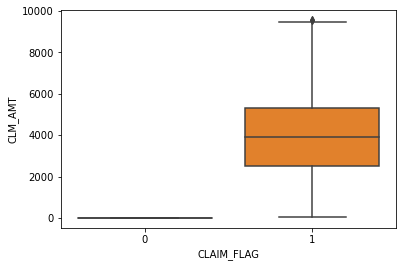

In [952]:
sns.boxplot(y = 'CLM_AMT', x = 'CLAIM_FLAG', data = df1)

# Finding number of outliers

In [962]:
# importing modules
from numpy import mean
from numpy import std

# calculating mean and std
data_mean = mean(df1['CLM_AMT'])
data_std =  std(df1['CLM_AMT'])


# identify outliers after  3 std
cut_off = data_std * 3


lower = data_mean - cut_off
upper =data_mean + cut_off

In [963]:
# identify outliers in the price
outliers = [x for x in df1['CLM_AMT'] if x < lower or x > upper]

# printing outliers
print("total outliers are :", len(outliers))

total outliers are : 187


In [957]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_iqr(df1['CLM_AMT'])
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [854.0, 856.0, 863.0, 864.0, 864.0, 865.0, 866.0, 867.0, 867.0, 868.0, 878.0, 879.0, 890.0, 892.0, 895.0, 909.0, 917.0, 920.0, 926.0, 931.0, 934.0, 937.0, 942.0, 943.0, 956.0, 960.0, 960.0, 962.0, 966.0, 978.0, 979.0, 980.0, 980.0, 980.0, 984.0, 991.0, 1005.0, 1009.0, 1009.0, 1020.0, 1022.0, 1026.0, 1026.0, 1029.0, 1030.0, 1030.0, 1030.0, 1031.0, 1036.0, 1036.0, 1037.0, 1042.0, 1043.0, 1043.0, 1050.0, 1058.0, 1062.0, 1065.0, 1069.0, 1070.0, 1076.0, 1089.0, 1097.0, 1098.0, 1100.0, 1102.0, 1102.0, 1107.0, 1107.0, 1107.0, 1114.0, 1119.0, 1125.0, 1131.0, 1133.0, 1133.0, 1133.0, 1137.0, 1139.0, 1144.0, 1145.0, 1146.0, 1148.0, 1150.0, 1151.0, 1153.0, 1155.0, 1157.0, 1158.0, 1165.0, 1166.0, 1168.0, 1185.0, 1187.0, 1200.0, 1204.0, 1205.0, 1206.0, 1207.0, 1212.0, 1213.0, 1215.0, 1220.0, 1221.0, 1222.0, 1226.0, 1230.0, 1232.0, 1237.0, 1245.0, 1254.0, 1257.0, 1261.0, 1264.0, 1267.0, 1274.0, 1277.0, 1280.0, 1282.0, 1283.0, 1283.0, 1288.0, 1290.0, 1294.0, 1299.0, 1304.0, 

In [959]:
median = np.median(df1['CLM_AMT'])# Replace with median
for i in sample_outliers:
    c = np.where(df1['CLM_AMT']==i, 14, df1['CLM_AMT'])
print("Sample: ", df1['CLM_AMT'])
print("New array: ",c)
# print(x.dtype)

Sample:  6        2946.0
8        6477.0
10       4021.0
11       2501.0
13       6077.0
          ...  
10297       0.0
10298       0.0
10299       0.0
10300       0.0
10301       0.0
Name: CLM_AMT, Length: 10095, dtype: float64
New array:  [2946. 6477. 4021. ...    0.    0.    0.]


Text(0.5, 0, 'Sample')

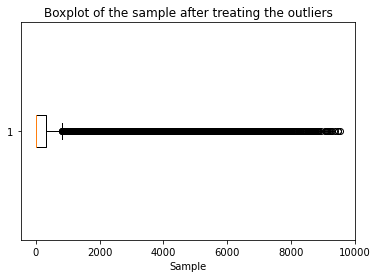

In [961]:
plt.boxplot(c, vert=False)
plt.title("Boxplot of the sample after treating the outliers")
plt.xlabel("Sample")

In [902]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10095 entries, 6 to 10301
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   KIDSDRIV                          10095 non-null  int64  
 1   AGE                               10095 non-null  float64
 2   YOJ                               10095 non-null  float64
 3   INCOME                            10095 non-null  float64
 4   HOME_VAL                          10095 non-null  float64
 5   EDUCATION                         10095 non-null  int64  
 6   OCCUPATION                        10095 non-null  int32  
 7   TRAVTIME                          10095 non-null  int64  
 8   BLUEBOOK                          10095 non-null  float64
 9   TIF                               10095 non-null  int64  
 10  CAR_TYPE                          10095 non-null  int32  
 11  OLDCLAIM                          10095 non-null  float64
 12  CLM_

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='INCOME'>

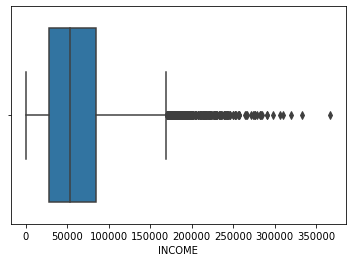

In [903]:
sns.boxplot(df1['INCOME'])

In [904]:
tenth = np.percentile(df1['INCOME'],10)
ninty = np.percentile(df1['INCOME'],90)
df1['INCOME']=np.where(df1['INCOME']<tenth,tenth,df1['INCOME'])
df1['INCOME']=np.where(df1['INCOME']>ninty,ninty,df1['INCOME'])

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='INCOME'>

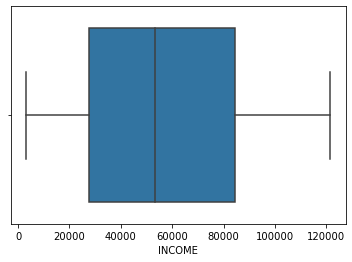

In [905]:
sns.boxplot(df1['INCOME'])

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HOME_VAL'>

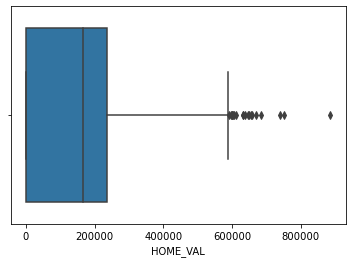

In [906]:
sns.boxplot(df1['HOME_VAL'])

In [907]:
tenth = np.percentile(df1['HOME_VAL'],10)
ninty = np.percentile(df1['HOME_VAL'],90)
df1['HOME_VAL']=np.where(df1['HOME_VAL']<tenth,tenth,df1['HOME_VAL'])
df1['HOME_VAL']=np.where(df1['HOME_VAL']>ninty,ninty,df1['HOME_VAL'])

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HOME_VAL'>

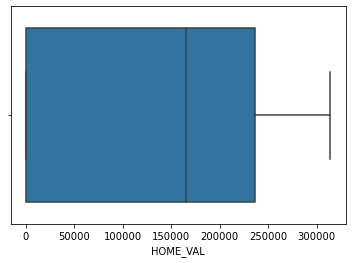

In [908]:
sns.boxplot(df1['HOME_VAL'])

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EDUCATION'>

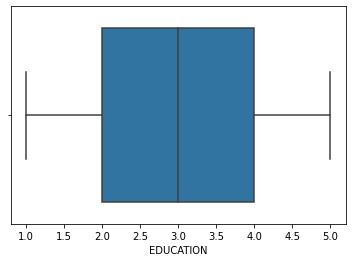

In [909]:
sns.boxplot(df1['EDUCATION'])

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OCCUPATION'>

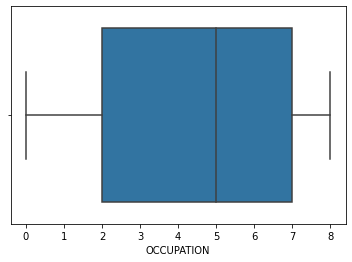

In [910]:
sns.boxplot(df1['OCCUPATION'])

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TRAVTIME'>

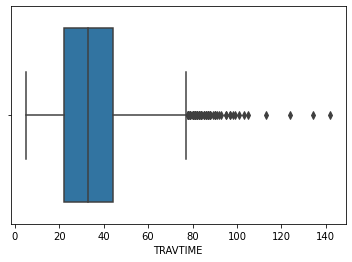

In [911]:
sns.boxplot(df1['TRAVTIME'])

In [912]:
tenth = np.percentile(df1['TRAVTIME'],10)
ninty = np.percentile(df1['TRAVTIME'],90)
df1['TRAVTIME']=np.where(df1['TRAVTIME']<tenth,tenth,df1['TRAVTIME'])
df1['TRAVTIME']=np.where(df1['TRAVTIME']>ninty,ninty,df1['TRAVTIME'])

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TRAVTIME'>

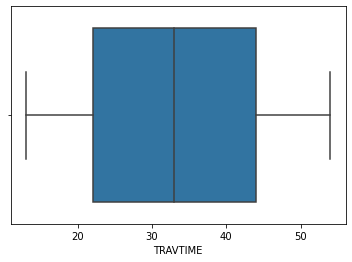

In [913]:
sns.boxplot(df1['TRAVTIME'])

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BLUEBOOK'>

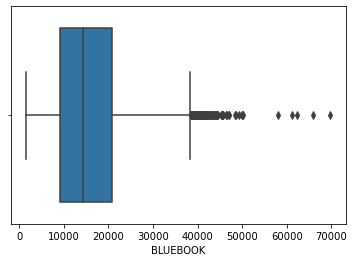

In [914]:
sns.boxplot(df1['BLUEBOOK'])

In [915]:
tenth = np.percentile(df1['BLUEBOOK'],10)
ninty = np.percentile(df1['BLUEBOOK'],90)
df1['BLUEBOOK']=np.where(df1['BLUEBOOK']<tenth,tenth,df1['BLUEBOOK'])
df1['BLUEBOOK']=np.where(df1['BLUEBOOK']>ninty,ninty,df1['BLUEBOOK'])

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BLUEBOOK'>

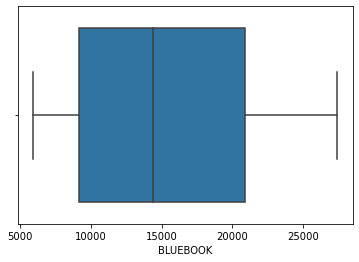

In [916]:
sns.boxplot(df1['BLUEBOOK'])

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TIF'>

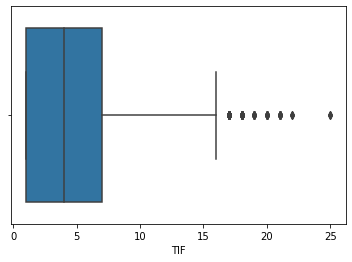

In [917]:
sns.boxplot(df1['TIF'])

In [918]:
tenth = np.percentile(df1['TIF'],10)
ninty = np.percentile(df1['TIF'],90)
df1['TIF']=np.where(df1['TIF']<tenth,tenth,df1['TIF'])
df1['TIF']=np.where(df1['TIF']>ninty,ninty,df1['TIF'])

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TIF'>

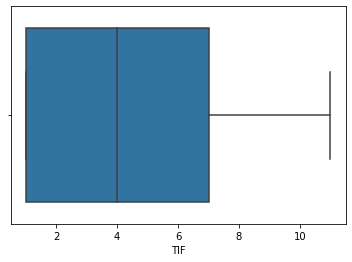

In [919]:
sns.boxplot(df1['TIF'])

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CAR_TYPE'>

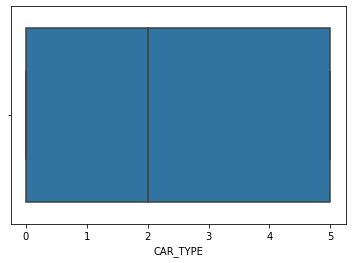

In [920]:
sns.boxplot(df1['CAR_TYPE'])

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OLDCLAIM'>

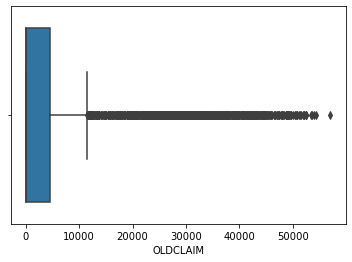

In [921]:
sns.boxplot(df1['OLDCLAIM'])

In [922]:
tenth = np.percentile(df1['OLDCLAIM'],10)
ninty = np.percentile(df1['OLDCLAIM'],90)
df1['OLDCLAIM']=np.where(df1['OLDCLAIM']<tenth,tenth,df1['OLDCLAIM'])
df1['OLDCLAIM']=np.where(df1['OLDCLAIM']>ninty,ninty,df1['OLDCLAIM'])

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OLDCLAIM'>

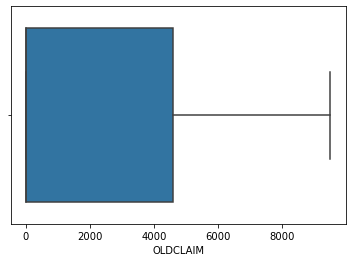

In [923]:
sns.boxplot(df1['OLDCLAIM'])

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CLM_FREQ'>

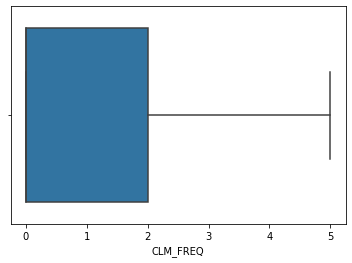

In [924]:
sns.boxplot(df1['CLM_FREQ'])

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0     4658
1     1467
2     1199
3      966
4      727
5      528
6      341
7      213
8      114
9       53
10      20
11      13
13       2
12       1
Name: MVR_PTS, dtype: int64

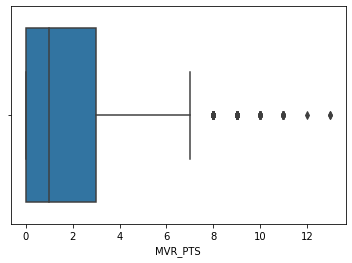

In [925]:
sns.boxplot(df1['MVR_PTS'])
df['MVR_PTS'].value_counts()

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CAR_AGE'>

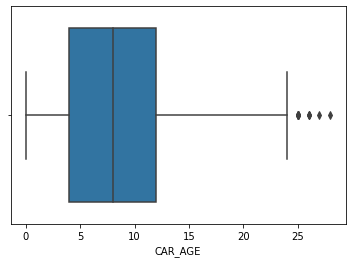

In [926]:
sns.boxplot(df1['CAR_AGE'])

In [927]:
tenth = np.percentile(df1['CAR_AGE'],10)
ninty = np.percentile(df1['CAR_AGE'],90)
df1['CAR_AGE']=np.where(df1['CAR_AGE']<tenth,tenth,df1['CAR_AGE'])
df1['CAR_AGE']=np.where(df1['CAR_AGE']>ninty,ninty,df1['CAR_AGE'])

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CAR_AGE'>

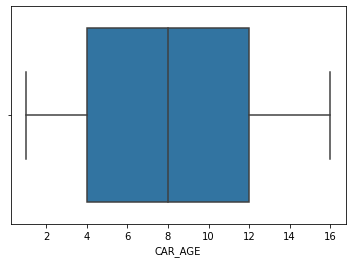

In [928]:
sns.boxplot(df1['CAR_AGE'])

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(1, 0, 'AGE'),
  Text(2, 0, 'YOJ'),
  Text(3, 0, 'INCOME'),
  Text(4, 0, 'HOME_VAL'),
  Text(5, 0, 'TRAVTIME'),
  Text(6, 0, 'BLUEBOOK'),
  Text(7, 0, 'TIF'),
  Text(8, 0, 'OLDCLAIM'),
  Text(9, 0, 'CLM_FREQ'),
  Text(10, 0, 'MVR_PTS'),
  Text(11, 0, 'CAR_AGE'),
  Text(12, 0, 'CLM_AMT')])

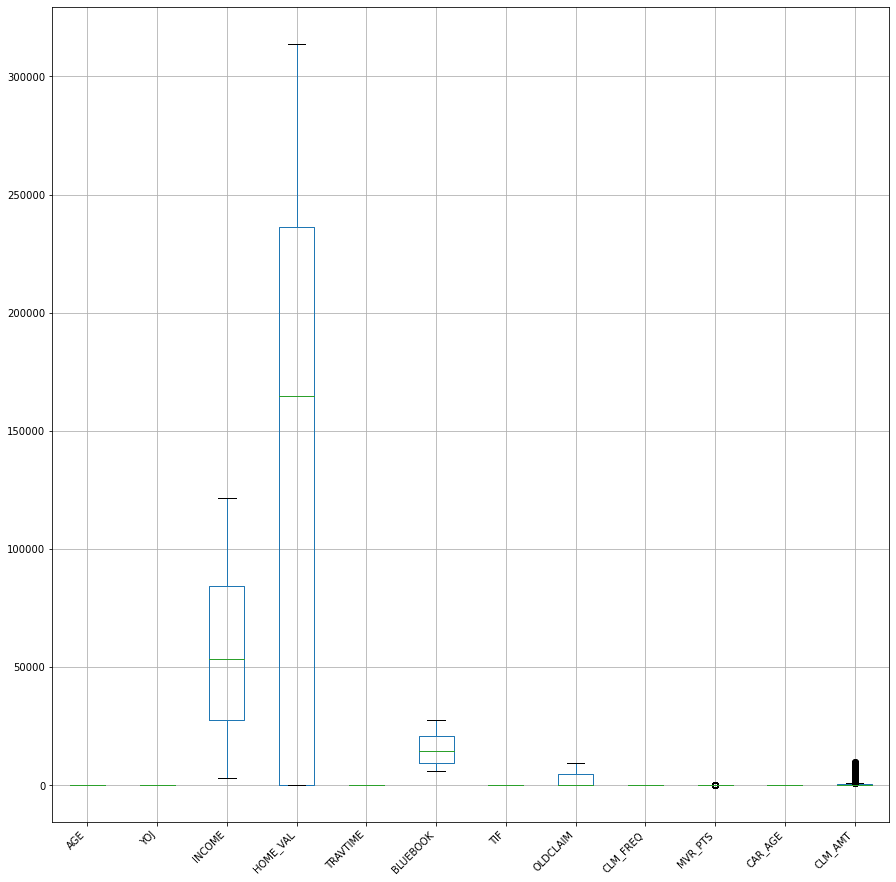

In [955]:
plt.figure(figsize=(15,15))
df1.boxplot(column=['AGE', 'YOJ', 'INCOME', 'HOME_VAL',
        'TRAVTIME', 'BLUEBOOK', 'TIF', 'OLDCLAIM',
       'CLM_FREQ', 'MVR_PTS', 'CAR_AGE','CLM_AMT'])
plt.xticks(rotation = 45, ha = 'right')

# Creating ML models Pipeline  

In [930]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X = df1.drop(['CLAIM_FLAG'], axis=1)
y = df1["CLAIM_FLAG"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [931]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

model=[]
model.append(LogisticRegression())
model.append(SVC())
model.append(KNeighborsClassifier())
model.append(DecisionTreeClassifier())
model.append(RandomForestClassifier())
model.append(GaussianNB())

In [932]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [933]:
model_list=['LogisticRegression','SVC','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','GaussianNB']
acc_list=[]
auc_list=[]
cm_list=[]
pre_list=[]

In [934]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
 
# Creating the hyperparameter grid
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
 
# Instantiating Decision Tree classifier
tree = DecisionTreeClassifier()
 
# Instantiating RandomizedSearchCV object
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5)
 
tree_cv.fit(X_train,y_train)
 
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 6, 'min_samples_leaf': 1}
Best score is 0.9748623484083148


In [935]:
for m in model:
    m.fit(X_train,y_train)
    y_pred = m.predict(X_test)
    acc_list.append(metrics.accuracy_score(y_test,y_pred))
    fpr,tpr,_=metrics.roc_curve(y_test,y_pred)
    auc_list.append(round(metrics.auc(fpr,tpr),2))
    cm_list.append(confusion_matrix(y_test,y_pred))
    pre_list.append(metrics.precision_score(y_test,y_pred))

In [936]:
pre_list

[1.0, 1.0, 0.9365750528541226, 1.0, 1.0, 1.0]

In [937]:
acc_list

[0.9990996398559424,
 0.8319327731092437,
 0.8628451380552221,
 0.9996998799519808,
 0.9990996398559424,
 1.0]

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'LogisticRegression'),
  Text(1, 0, 'SVC'),
  Text(2, 0, 'KNeighborsClassifier'),
  Text(3, 0, 'DecisionTreeClassifier'),
  Text(4, 0, 'RandomForestClassifier'),
  Text(5, 0, 'GaussianNB')])

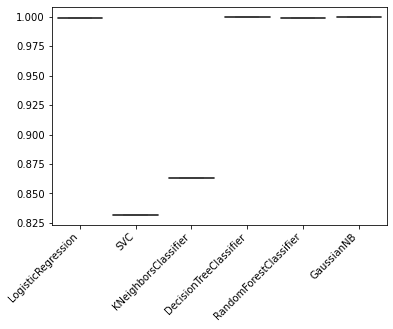

In [938]:
sns.boxplot(x=model_list,y=acc_list)
plt.xticks(rotation = 45, ha = 'right')

In [939]:
from imblearn.over_sampling import SMOTE

In [940]:
s=SMOTE()

In [941]:
x_train_smote,y_train_smote = s.fit_resample(X_train,y_train)

In [942]:
y_train.value_counts()

0    5094
1    1669
Name: CLAIM_FLAG, dtype: int64

In [943]:
y_train_smote.value_counts()

0    5094
1    5094
Name: CLAIM_FLAG, dtype: int64

In [944]:
from statsmodels import api as sm

In [945]:
model=sm.GLM(y_train_smote,x_train_smote, family = sm.families.Binomial())

In [946]:
mod=model.fit()

PerfectSeparationError: Perfect separation detected, results not available

In [ ]:
mod.summary()
# To check for randomness in how claim flag is affected by other features 

In [ ]:
#df1.drop(['YOJ'],axis=1,inplace=True)
# decrease in accuracy due to drop of this column

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
s=StandardScaler().fit(X_train)

In [ ]:
s=s.transform(X_train)

In [ ]:
# m=RandomForestClassifier()

In [ ]:
# m=m.fit(s,y_train)

In [ ]:
# y_pred=m.predict(X_test)

In [ ]:
# metrics.accuracy_score(y_test,y_pred)

In [ ]:
# for m in model:
#     m.fit(x_train_smote,y_train_smote)
#     y_pred = m.predict(X_test)
#     acc_list.append(metrics.accuracy_score(y_test,y_pred))
#     fpr,tpr,_=metrics.roc_curve(y_test,y_pred)
#     auc_list.append(round(metrics.auc(fpr,tpr),2))
#     cm_list.append(confusion_matrix(y_test,y_pred))

In [ ]:
 acc_list

In [ ]:
# Standardisation doesnot increase the accuracy in this case

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
mod=ExtraTreesClassifier()

In [ ]:
mod=mod.fit(x_train_smote,y_train_smote)

In [ ]:
y_pred=mod.predict(X_test)

In [ ]:
metrics.accuracy_score(y_pred,y_test)

In [ ]:
# Smoting is only decreasing the accuracy and can be ignored

In [ ]:
# Feature seletion using 
    # k-best
    # rfe

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, RFE

In [ ]:
l=RandomForestClassifier()

In [ ]:
rfe = RFE(l,n_features_to_select=22)
model = rfe.fit(X_train, y_train)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
metrics.accuracy_score(y_pred,y_test)

In [ ]:
print(rfe.ranking_)
print(X_train.columns)
X_train.shape

In [ ]:
# as we can see that almost all columns are of similar ranking we cannot drop any of them 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier()

In [ ]:
model = model.fit(x_train_smote,y_train_smote)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
metrics.accuracy_score(y_test,y_pred)

In [ ]:
error = pd.DataFrame({'actual': y_test , 'predict':y_pred})

In [ ]:
error= error.reset_index(drop=True)

In [ ]:
error

In [ ]:
plt.plot(error)